<a href="https://colab.research.google.com/github/Dongkyu1102/Data_final_project_Naver/blob/main/%EC%87%BC%ED%95%91%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%98%95%ED%83%9C%EC%86%8C%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파일 불러오기 및 모듈 세팅

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import os
import re
from tqdm.auto import tqdm

In [ ]:
DATA_PATH = "/content/drive/MyDrive/2조_누구냐, 넌!/04. 기타자료/Naver_shopping_크롤링/중복제거/"

In [ ]:
brand = '살림백서'
df = pd.read_csv(f"{DATA_PATH}{brand}_중복제거.csv")
df # 전처리(대표제품+NaN 선택 후 리뷰 중복제거)

In [ ]:
df.shape[0]

In [ ]:
df['brand']=f'{brand}'
df

# mecab 형태소 분석 설치 및 테스트

In [ ]:
pip install pyLDAvis # 최신버전으로 런타임 재실행 필수 !!!!!!!!!!!

In [ ]:
# pip install pyLDAvis --upgrade # 최신버전으로 업그레이드

In [ ]:
# !pip install pyLDAvis==2.1.2  # 구버전으로 런타임 재실행 안해도 됨.

In [ ]:
# https://github.com/SOMJANG/Mecab-ko-for-Google-Colab

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

In [ ]:
cd Mecab-ko-for-Google-Colab

In [ ]:
!bash install_mecab-ko_on_colab_light_220429.sh

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
mecab.morphs("영등포구청역에 있는 맛집 좀 알려주세요.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['영등포구청역', '에', '있', '는', '맛집', '좀', '알려', '주', '세요', '.']

In [ ]:
mecab.nouns("우리나라에는 무릎 치료를 잘하는 정형외과가 없는가!")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['우리', '나라', '무릎', '치료', '정형', '외과']

In [ ]:
mecab.pos("자연주의 쇼핑몰은 어떤 곳인가?")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('자연주의', 'NNG'),
 ('쇼핑몰', 'NNG'),
 ('은', 'JX'),
 ('어떤', 'MM'),
 ('곳', 'NNG'),
 ('인가', 'VCP+EF'),
 ('?', 'SF')]

# mecab 형태소 분석 + LDA

In [ ]:
df['content']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       요즘들어 부쩍 더 시도때도 없이 이곳저곳 할것없이 암만치우고 치워도 계속계속 빠져나...
1       솔직히 사고 몇번 안써봤지만 구매할때 엄청고민하고 많이 알아보고 구매해서  고민하시...
2       악지성이에요..아침에 머리감아도 오후되면 앞머리가 뭉쳐요 ㅡㅡ; 애들도 저닮아서 하...
3       와... 배송에 놀랬습니다.  목요일 저녁 퇴근 후 주문했는데 .. 다음날 아침에 ...
4       택배도 포장 꼼꼼하고 무엇보다 향도 괜찮고  거품도 많이 나오더라고요. 리뷰보고 처...
                              ...                        
9962                              용량,가격,향기,부드러움,순함👍🏻😵‍💫👍🏻
9963                                        아직미사용중입니다 ㅎㅎㅎ
9964                                   탈모가 일상이라 한 번 써보려궁ㅛ
9965                                       좋아요  좋아요 .....
9966                                           개좋음~~~~~~~
Name: content, Length: 9967, dtype: object

In [ ]:
content = []
for i in range(df.shape[0]):
    content.append(df['content'][i])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
content

In [ ]:
mecab_lst = []
for text in content:
    mecab_lst.append(mecab.nouns(text))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(mecab_lst)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


9967

In [ ]:
cnt_mecab = []
for i in mecab_lst:
    cnt_mecab += i

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from collections import Counter

cnt = Counter(cnt_mecab)
cnt.most_common(30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('사용', 2949),
 ('탈모', 2131),
 ('샴푸', 1652),
 ('구매', 1487),
 ('거품', 1412),
 ('효과', 1390),
 ('향', 1382),
 ('머리', 1267),
 ('것', 1149),
 ('거', 1084),
 ('배송', 1021),
 ('만족', 958),
 ('제품', 746),
 ('세정력', 664),
 ('머리카락', 594),
 ('두피', 585),
 ('느낌', 565),
 ('가격', 545),
 ('번', 517),
 ('후기', 513),
 ('달', 444),
 ('중', 428),
 ('감사', 413),
 ('기대', 410),
 ('후', 385),
 ('때', 364),
 ('전', 364),
 ('용량', 356),
 ('주문', 351),
 ('양', 329)]

# LDA 및 시각화

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim.corpora.dictionary import Dictionary
from gensim.models.callbacks import PerplexityMetric

dic = Dictionary(mecab_lst)
dic.filter_extremes(no_below=2, no_above=0.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus = [dic.doc2bow(comments) for comments in mecab_lst]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models.nmf import CoherenceModel
import matplotlib.pyplot as plt

passes = 20
coherence_values = []
id2word = dic.id2token

for i in tqdm(range(2,10)):
    model = LdaModel(
        corpus=corpus,
        id2word=dic,
        num_topics=i, # 최적의 토픽수 찾아보기
        passes=passes,
        random_state=42
    )
    coherence_model_lda = CoherenceModel(model=model, texts=mecab_lst, dictionary=dic, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


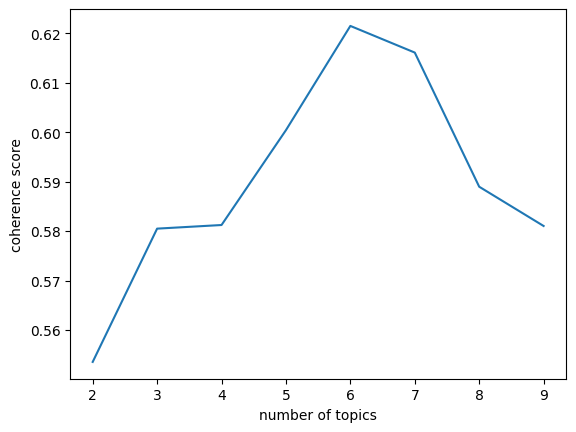

In [ ]:
x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [ ]:
num_topics = 6
passes = 20


model = LdaModel(
    corpus=corpus,
    id2word=dic,
    num_topics=num_topics,
    passes=passes,
    random_state=42
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pickle
import pyLDAvis.gensim
import pyLDAvis

pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(model, corpus, dic)
pyLDAvis.display(p)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
